In [2]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack


'\nimport plotly\nimport plotly.figure_factory as ff\nfrom plotly.graph_objs import Scatter, Layout\n\nplotly.offline.init_notebook_mode(connected=True)\nwarnings.filterwarnings("ignore")\n'

In [2]:
data = pd.read_json("tops_fashion.json")

In [3]:
data.head()

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN


In [4]:
print(data.shape)

(183138, 19)


In [5]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [6]:
data= data[['asin', 'brand' , 'color' , 'medium_image_url' , 'product_type_name', 'title', 'formatted_price']]

In [7]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [8]:
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [9]:
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [10]:
product_type_count = Counter((data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [11]:
brand_count = Counter((data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [12]:
color_count = Counter((data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [13]:
data['formatted_price'].describe()

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [14]:
price_count = Counter((data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [15]:
data['title'].describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [16]:
data.to_pickle('pickles/180k_apparel_data')

In [17]:
data = data.loc[~data['formatted_price'].isnull()]

In [18]:
data.shape[0]

28395

In [19]:
data = data.loc[~data['color'].isnull()]
data.shape[0]

28385

In [20]:
data.to_pickle('pickles/28k_apparel_data')

In [22]:
data = pd.read_pickle('pickles/28k_apparel_data')

In [23]:
data.duplicated('title')

4         False
6         False
11        False
15        False
21        False
          ...  
183110    False
183120    False
183124    False
183133    False
183136    False
Length: 28385, dtype: bool

In [24]:
print(sum(data.duplicated('title')))

2325


In [25]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [26]:
#remove all products with very few words in title

data_sorted= data[data['title'].apply(lambda x: len(x.split()) > 4)]
data_sorted.shape

(27949, 7)

In [27]:
#Sort the whole data based on title (alphabetical order of title)
data_sorted.sort_values('title', inplace = True, ascending = False)

<ipython-input-27-e1d015256c2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted.sort_values('title', inplace = True, ascending = False)


In [28]:
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [29]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)
    
indices

[61973,
 133820,
 81461,
 75995,
 151570,
 152506,
 76209,
 103647,
 138588,
 95954,
 74338,
 18905,
 60078,
 59030,
 177229,
 22273,
 135865,
 171318,
 44082,
 40331,
 60603,
 56982,
 39370,
 120006,
 8424,
 139484,
 94413,
 167267,
 92382,
 93518,
 101522,
 74087,
 51286,
 35796,
 73818,
 127730,
 37902,
 164994,
 125784,
 129103,
 161966,
 151598,
 100567,
 102610,
 80880,
 74066,
 167810,
 100898,
 86604,
 153020,
 168828,
 97684,
 83173,
 37290,
 17234,
 130798,
 128762,
 38107,
 32240,
 141241,
 37911,
 142996,
 115660,
 163170,
 73633,
 132135,
 42468,
 69292,
 32217,
 169883,
 108966,
 68893,
 115422,
 141090,
 80785,
 92051,
 165541,
 150090,
 163741,
 123456,
 57588,
 116686,
 170034,
 160212,
 144984,
 142244,
 141432,
 118353,
 101884,
 110314,
 140321,
 76493,
 135579,
 85390,
 78409,
 158069,
 148089,
 100597,
 140457,
 137999,
 147641,
 94653,
 120825,
 145597,
 114795,
 98140,
 148772,
 80202,
 113184,
 79120,
 93161,
 86422,
 103918,
 157939,
 99504,
 85577,
 133860,
 

In [30]:
import itertools
stage1_dedupe_asins = []
i=0
j=0

num_data_points = data_sorted.shape[0]

while i<num_data_points and j<num_data_points:
    
    prev_i=i
    
    a= data['title'].loc[indices[i]].split()
    
    j=i+1
    
    while j< num_data_points:
        
        b=data['title'].loc[indices[j]].split()
        
        length = max(len(a),len(b))
        
        count = 0
        
        for k in itertools.zip_longest(a,b):
            if(k[0]==k[1]):
                count+=1
        
        if (length - count) > 2:
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            
            if (j == num_data_points - 1):
                stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
            
            i=j
            break
        
        else:
            j+=1
    
    if prev_i == i:
        break

In [31]:
len(stage1_dedupe_asins)

17593

In [32]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [33]:
data.shape

(17593, 7)

In [34]:
data.to_pickle('pickles/17k_apperal_data')

In [35]:
data = pd.read_pickle('pickles/17k_apperal_data')

In [36]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53


# Text Processing

In [39]:
data = pd.read_pickle('pickles/17k_apperal_data')

In [42]:
stop_words = set(stopwords.words('english'))


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
def nlp_preprocessing(total_text, index, column):
    
    if(type(total_text) is not int):
        string=""
        
        for words in total_text.split():
            
            word = "".join(e for e in words if e.isalnum())
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
                
        data[column][index]=string    

In [44]:
for index,row in data.iterrows():
    nlp_preprocessing(row['title'],index,'title')
    

In [48]:
data.head()['title']  # stop words removed

4     featherlite ladies long sleeve stain resistant...
6     womens unique 100 cotton  special olympics wor...
15    featherlite ladies moisture free mesh sport sh...
27    supernatural chibis sam dean castiel neck tshi...
43      featherlite ladies silky smooth pique white xl 
Name: title, dtype: object

In [49]:
data.to_pickle('pickles/17k_apperal_data_preprocessed')

In [3]:
data = pd.read_pickle('pickles/17k_apperal_data_preprocessed')

In [4]:
#display an Image

def display_img(url, ax, fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)

In [5]:
#plotting code to understand the algo's decision
def plot_heatmap(keys , values, labels, url, text):
    
    # we will devide the whole figure into two parts
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
    fig = plt.figure(figsize=(25,3))
    
    # 1st, ploting heat map that represents the count of commonly ocurred words in title2
    ax = plt.subplot(gs[0])
    # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
    ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
    ax.set_xticklabels(keys) # set that axis labels as the words of title
    ax.set_title(text) # apparel title
    
    # 2nd, plotting image of the the apparel
    ax = plt.subplot(gs[1])
    # we don't want any grid lines for image and no labels on x-axis and y-axis
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    display_img(url, ax, fig)
        
    # displays combine figure ( heat map and image together)
    plt.show()

    

In [22]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    
    intersection = set(vec1.keys()) & set(vec2.keys())
    
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
            
    #keys contains list of all words in title2
    keys = list(vec2.keys())
    values = [vec2[x] for x in vec2.keys()]
    
    labels = values
    
    plot_heatmap(keys, values, labels, url, text)
    
    

In [20]:
def text_to_vector(text):
    
    words = text.split()
    return Counter(words)
    

In [8]:
def get_result(doc_id, content_a, content_b, url, model):
    
    text1=content_a
    text2=content_b
    
    vector1=text_to_vector(content_a)
    vector2=text_to_vector(content_b)
    
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)
    

# Bag of Words (BoW) on product titles

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])

title_features.shape

(17593, 12927)

In [13]:
#  17593===> no of titles , 
#  12927===> no. of unique words

In [17]:
def bag_of_words_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features , title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        
        get_result(indices[i], data['title'].loc[df_indices[0]] , data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'BoW')
        
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)
    

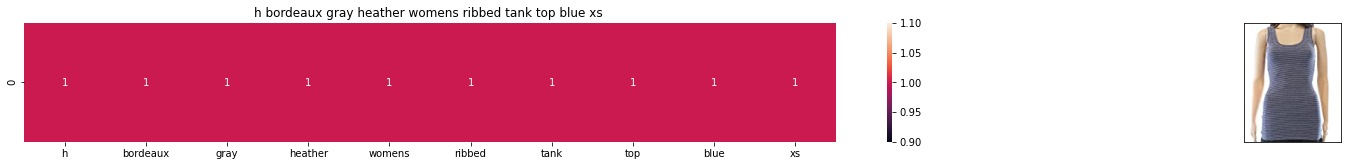

ASIN : B06XDPPF93
Brand: H By Bordeaux
Title: h bordeaux gray heather womens ribbed tank top blue xs 
Euclidean similarity with the query image : 0.0


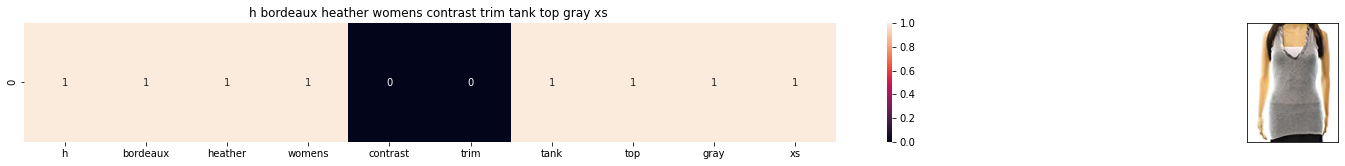

ASIN : B072J9J3YP
Brand: H By Bordeaux
Title: h bordeaux heather womens contrast trim tank top gray xs 
Euclidean similarity with the query image : 2.0


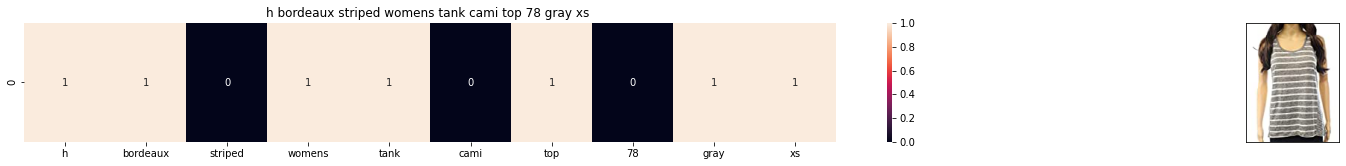

ASIN : B06X9VYDBK
Brand: H By Bordeaux
Title: h bordeaux striped womens tank cami top 78 gray xs 
Euclidean similarity with the query image : 2.449489742783178


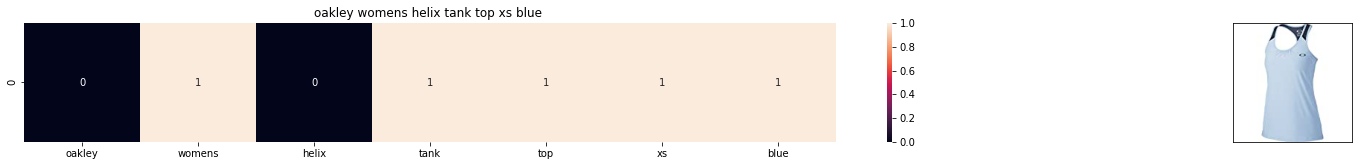

ASIN : B00VIDZIXC
Brand: Oakley
Title: oakley womens helix tank top xs blue 
Euclidean similarity with the query image : 2.449489742783178


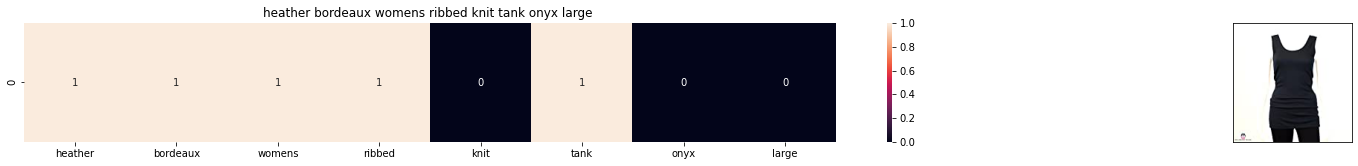

ASIN : B074Q44FZP
Brand: Heather by Bordeaux
Title: heather bordeaux womens ribbed knit tank onyx large 
Euclidean similarity with the query image : 2.6457513110645907


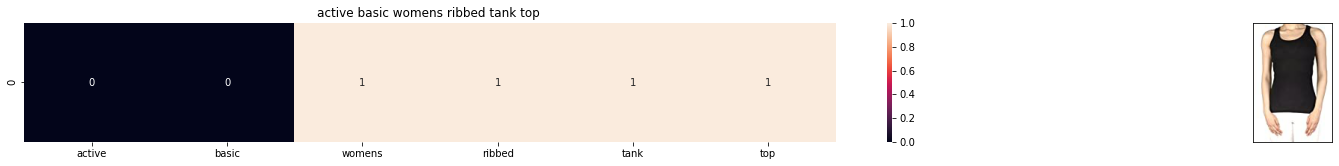

ASIN : B00B7B09SE
Brand: Active Products
Title: active basic womens ribbed tank top 
Euclidean similarity with the query image : 2.6457513110645907


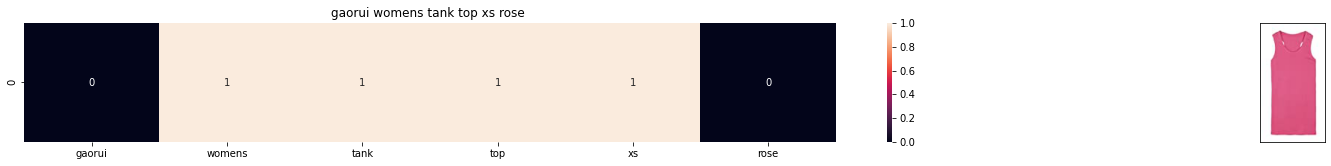

ASIN : B00ENWZ204
Brand: Gaorui
Title: gaorui womens tank top xs rose 
Euclidean similarity with the query image : 2.6457513110645907


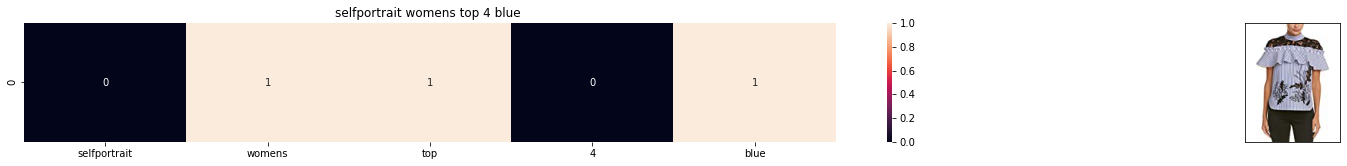

ASIN : B0753LB49H
Brand: Self-Portrait
Title: selfportrait womens top 4 blue 
Euclidean similarity with the query image : 2.6457513110645907


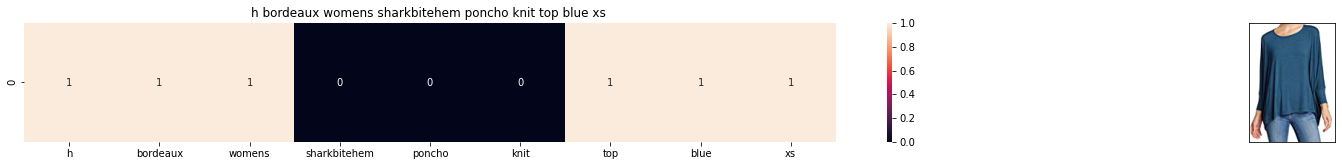

ASIN : B06XDPXC76
Brand: H By Bordeaux
Title: h bordeaux womens sharkbitehem poncho knit top blue xs 
Euclidean similarity with the query image : 2.6457513110645907


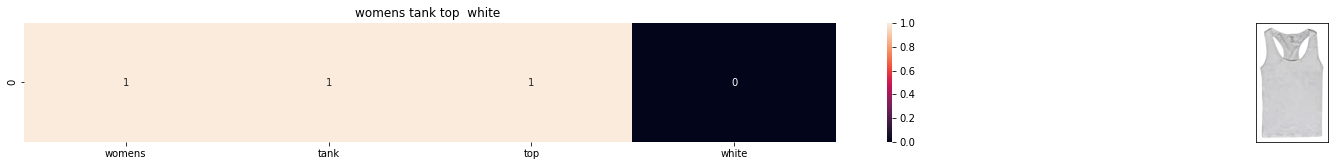

ASIN : B00JPOZ9GM
Brand: Sofra
Title: womens tank top  white 
Euclidean similarity with the query image : 2.6457513110645907


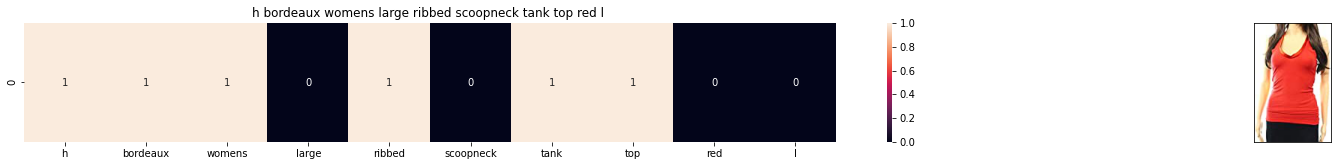

ASIN : B071W19QVB
Brand: H By Bordeaux
Title: h bordeaux womens large ribbed scoopneck tank top red l 
Euclidean similarity with the query image : 2.6457513110645907


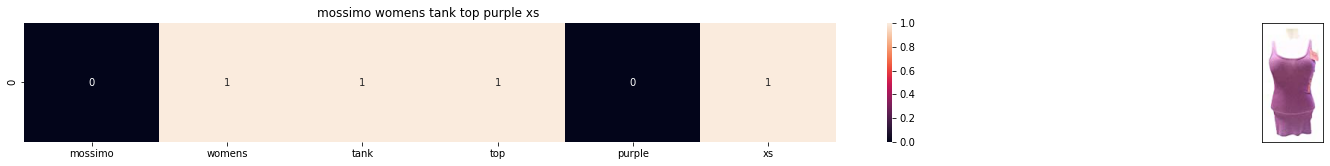

ASIN : B071RYBNJ3
Brand: Mossimo
Title: mossimo womens tank top purple xs 
Euclidean similarity with the query image : 2.6457513110645907


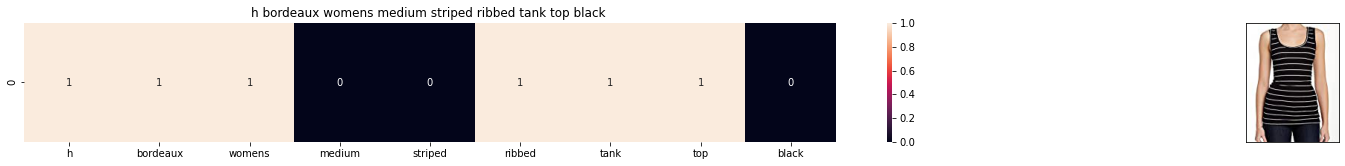

ASIN : B07574D8KQ
Brand: H By Bordeaux
Title: h bordeaux womens medium striped ribbed tank top black 
Euclidean similarity with the query image : 2.6457513110645907


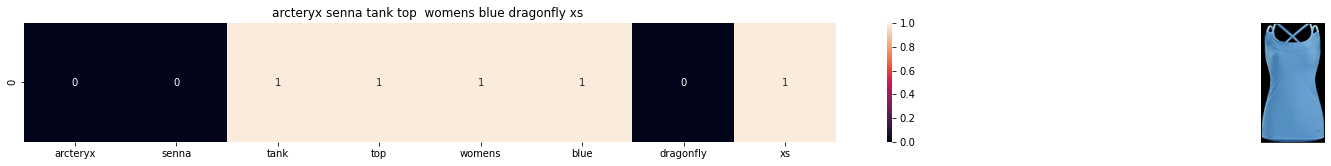

ASIN : B00ZKF4TLG
Brand: Arc'teryx
Title: arcteryx senna tank top  womens blue dragonfly xs 
Euclidean similarity with the query image : 2.6457513110645907


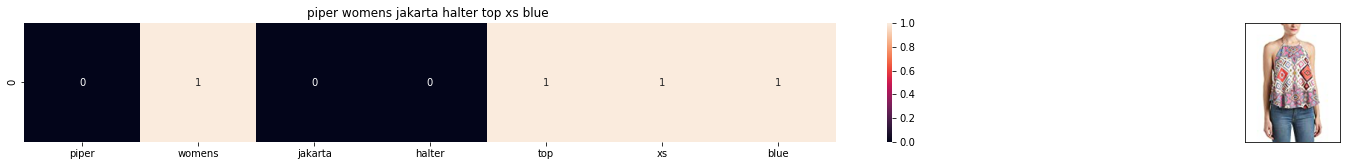

ASIN : B06XDGK19X
Brand: Piper
Title: piper womens jakarta halter top xs blue 
Euclidean similarity with the query image : 2.8284271247461903


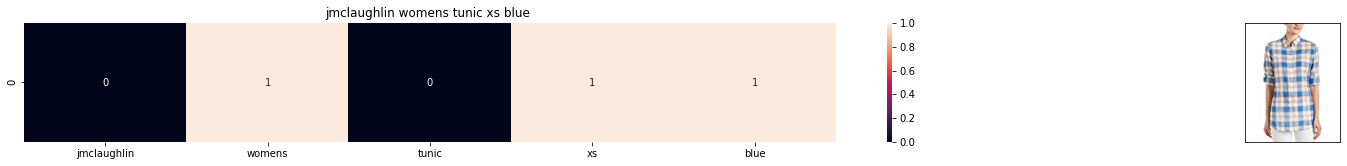

ASIN : B06XCDMV3P
Brand: J. McLaughlin
Title: jmclaughlin womens tunic xs blue 
Euclidean similarity with the query image : 2.8284271247461903


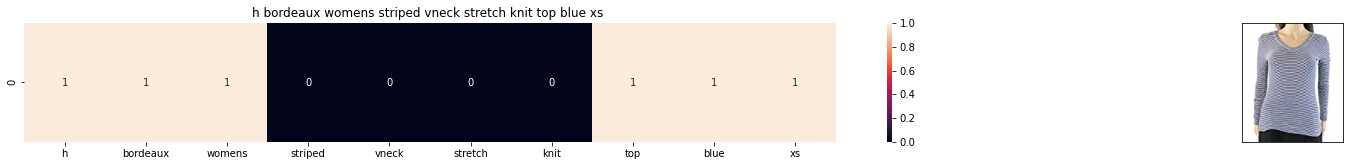

ASIN : B0722XDNFX
Brand: H By Bordeaux
Title: h bordeaux womens striped vneck stretch knit top blue xs 
Euclidean similarity with the query image : 2.8284271247461903


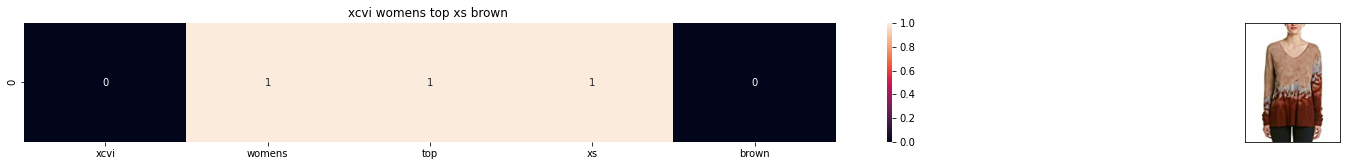

ASIN : B01N7V7SIG
Brand: XCVI
Title: xcvi womens top xs brown 
Euclidean similarity with the query image : 2.8284271247461903


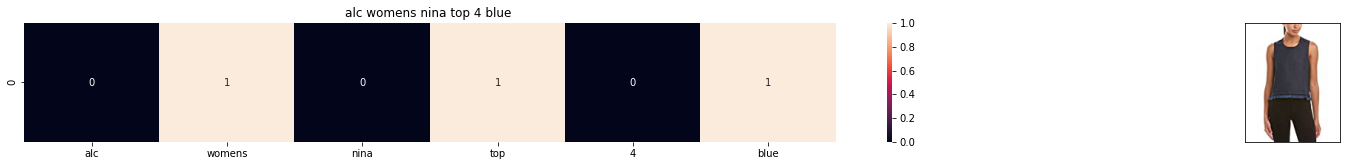

ASIN : B01MPX3OQJ
Brand: A.L.C.
Title: alc womens nina top 4 blue 
Euclidean similarity with the query image : 2.8284271247461903


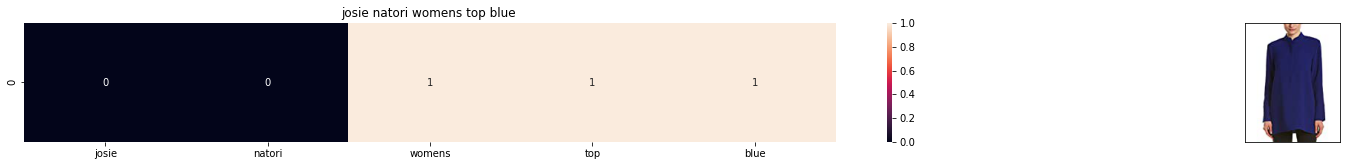

ASIN : B01NBXRIH8
Brand: Josie by Natori
Title: josie natori womens top blue 
Euclidean similarity with the query image : 2.8284271247461903


In [27]:

bag_of_words_model(5001, 20)